# Logistic regression assign.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df_1 = pd.read_csv('bank-full.csv',sep=';')
df_1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
df_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [4]:
columns = ['age', 'balance', 'duration', 'campaign', 'y']
df_1_sel = df_1[columns]
df_1_sel.describe()

,age,balance,duration,campaign
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,258.163080,2.763841
std,10.618762,3044.765829,257.527812,3.098021
min,18.000000,-8019.000000,0.000000,1.000000
25%,33.000000,72.000000,103.000000,1.000000
50%,39.000000,448.000000,180.000000,2.000000
75%,48.000000,1428.000000,319.000000,3.000000
max,95.000000,102127.000000,4918.000000,63.000000


In [5]:
df_1_sel.corr()

,age,balance,duration,campaign
age,1.000000,0.097783,-0.004648,0.004760
balance,0.097783,1.000000,0.021560,-0.014578
duration,-0.004648,0.021560,1.000000,-0.084570
campaign,0.004760,-0.014578,-0.084570,1.000000


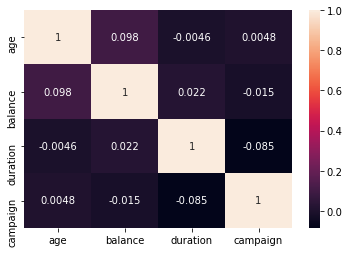

In [6]:
sns.heatmap(df_1_sel.corr(), annot=True);

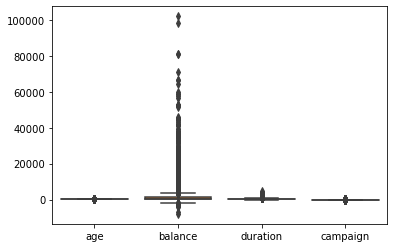

In [7]:
sns.boxplot(data = df_1_sel);

In [8]:
df_1_sel['outcome'] = df_1_sel.y.map({'no':0, 'yes':1})
df_1_sel

<ipython-input-8-7d82a95e3aaf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1_sel['outcome'] = df_1_sel.y.map({'no':0, 'yes':1})


,age,balance,duration,campaign,y,outcome
0,58,2143,261,1,no,0
1,44,29,151,1,no,0
2,33,2,76,1,no,0
3,47,1506,92,1,no,0
4,33,1,198,1,no,0
...,...,...,...,...,...,...
45206,51,825,977,3,yes,1
45207,71,1729,456,2,yes,1
45208,72,5715,1127,5,yes,1
45209,57,668,508,4,no,0


In [9]:
feature_col=['age','balance','duration','campaign']
output_target=['outcome']
X = df_1_sel[feature_col]
Y = df_1_sel[output_target]

In [10]:
classifier = LogisticRegression()

In [11]:
classifier.fit(X,Y)

C:\Users\zaid\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [12]:
classifier.coef_

array([[ 7.69721526e-03,  3.72191064e-05,  3.54908897e-03,
        -1.39828304e-01]])

In [13]:
classifier.predict_proba (X)

array([[0.8736739 , 0.1263261 ],
       [0.92488732, 0.07511268],
       [0.9459632 , 0.0540368 ],
       ...,
       [0.30553764, 0.69446236],
       [0.82336234, 0.17663766],
       [0.86407825, 0.13592175]])

In [14]:
y_pred = classifier.predict(X)

In [15]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)

In [17]:
print(confusion_matrix)

[[39342   580]
 [ 4435   854]]


In [18]:
((39342+854)/(39342+854+4435+580))*100

88.90756674260689

In [19]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     39922
           1       0.60      0.16      0.25      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.57      0.60     45211
weighted avg       0.86      0.89      0.86     45211



Text(0, 0.5, 'True Positive Rate')

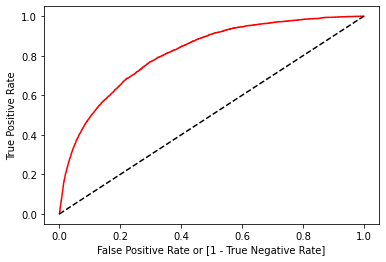

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [21]:
auc

0.5734694329116669